### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

- The _indepenent variable_ is a categorical variable representing the **word's ink-vs-read color** (ex. Congruent vs. Incongrunet).
    - Congrount category: $$color_{ink} = color_{read}$$
    - Incongrount category: $$color_{ink} \neq color_{read}$$


- The _dependent variable_ is a containous variable representing the **time** needed to name the ink color.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

The null hypothesies assumes that the **time** needed to name the ink color for the incongrount group ($t_i$) is the same (or less) than the time needed for the congrount group ($t_c$).

The alternative hypothesies assumes that the **time** needed to name the ink color for the incongrount group ($t_i$) is larger than the time needed for the congrount group ($t_c$).

$$H_0: t_{i}-t_{c} \leq 0$$
$$H_1: t_{i}-t_{c} > 0$$

$$\alpha \leq 5\% $$

Where 
- $t_{i}$ and $t_{c}$ are the time-to-read the word's color for icongrount & congrount groups respectively.
- $\alpha$ is the maximum acceptable **Type I** error rate


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
import math


% matplotlib inline

df = pd.read_csv('stroopdata.csv')
df.head(3)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214


In [3]:
df.shape

(24, 2)

In [4]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


**Mean**: $\mu_{c} = 14.05$ vs. $\mu_{i} = 22.01$ for congrount & incongrount groups respectively.

**Standard Deviation**: $\sigma_c = 3.56$ vs. $\sigma_c = 4.80$ for congrount & incongrount groups respectively.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

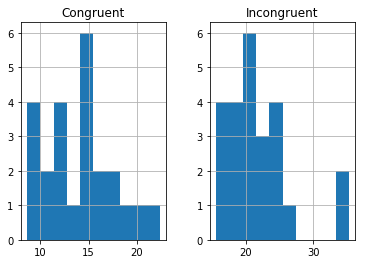

In [7]:
df.hist();

Histagram above dons't infer the shape of the distribution, it is also hard to compare the two distributions on two separate graphs. 

Will use distribution plots from seaboarn package.

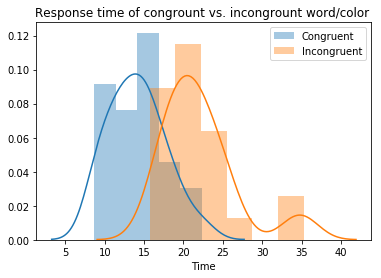

In [21]:
# Plot distribution of both groups
sns.distplot(df['Congruent'],label = "Congruent")
sns.distplot(df['Incongruent'],label = "Incongruent")
plt.xlabel("Time");
plt.title("Response time of congrount vs. incongrount word/color ");
plt.legend();

Findings

- **Congruent Group**: follows a normal distribution.

- **Incongruent Group**: follows a bi-modal normal distribution with a small peak at **x-value = 35**.

- Graph infer that Congrount group have a faster response time.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [27]:
# Identify degrees of freedom (as df size - 1)
df.shape

(24, 2)

Hence, degrees of freedom is 24-1 = 23

In [23]:
# performing test for 95% confidence level.
t.ppf(.95, 23)

1.7138715277470473

Hence, T-critical is 1.71239

In [31]:
#Identify the t-statistic
df['Difference'] = df['Congruent'] - df['Incongruent']
print("Std-dev of Difference = {0:.4f}".format(df['Difference'].std(axis=0)))

Std-dev of Difference = 4.8648


Mean is $\mu_{c} = 14.05$ vs. $\mu_{i} = 22.01$ for congrount & incongrount groups respectively.

Difference in mean is 7.97

In [33]:
print("T-statistic = {0:.4f}".format(7.97/(4.8648 / math.sqrt(24))))

T-statistic = 8.0260


## Conclusion
T-statistic of **8.0260** is less than the critical value of **1.7139** for **95%** confidience level and **23** degrees of freedom.

Hence, we reject the null hypothessis & can confirm that the time needed to analyize a congrouent set is statistically less than the time needed to analyize an incongrouent set.